In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('./store_delegate.tsv', sep='\t')
df.head()

,name,score,station,tel,address,latitude,longitude,open_time,closed_days,sheets,url,icon_url,x,delegate1,delegate2,geometry
0,麺屋ひょっとこ 交通会館店,3.78,有楽町駅,03-3211-6002,東京都千代田区有楽町2-10-1 東京交通会館 B1F,35.675100,139.764478,[平日]11:00～20:00[土]11:00～19:00※売り切れ次第終了,日・祝,7席 （カウンターのみ）,https://tabelog.com/tokyo/A1301/A130102/13046637/,https://tblg.k-img.com/resize/640x640c/restaur...,1,1,0,POINT (139.7644783616861 35.67509971838255)
1,むぎとオリーブ 銀座店,3.78,東銀座駅,03-3571-2123,東京都中央区銀座6-12-12 銀座ステラビル 1F,35.668956,139.764284,【平日】11:30～22:00（L.O.21:45）【土・祝】11:30～21:00（L.O...,日曜日,15席 （カウンター15席）,https://tabelog.com/tokyo/A1301/A130101/13164932/,https://tblg.k-img.com/resize/640x640c/restaur...,1,1,1,POINT (139.7642844939659 35.66895648319166)
2,麺処 銀笹 （ぎんざさ）,3.78,築地市場駅,03-3543-0280,東京都中央区銀座8-15-2 藤ビル 1F,35.666225,139.763407,11:30～15:0017:30～22:00,日曜・祝日,18席 （４人掛けテーブル４卓、２人掛けテーブル１卓）,https://tabelog.com/tokyo/A1301/A130103/13119563/,https://tblg.k-img.com/resize/640x640c/restaur...,1,1,1,POINT (139.7634074703386 35.66622509335693)
3,銀座 朧月 （おぼろづき）,3.77,銀座駅,非公開,東京都中央区銀座6-3-5 第一高橋ビル 1F,35.671582,139.761402,【月・火・水】11:30～15:3017:30～22:00【木・金】11:30〜15:301...,第１週土曜日,7席 （カウンターのみ）,https://tabelog.com/tokyo/A1301/A130101/13118141/,https://tblg.k-img.com/resize/640x640c/restaur...,1,1,0,POINT (139.7614021124773 35.67158170760406)
4,新橋 纏 （まとい）,3.77,新橋駅,03-3436-6003,東京都港区新橋3-13-2 IKENO-5 1F,35.665866,139.756298,【平日】11:00～15:0017:30～22:00【土】11:00～15:0017:30～...,無休,9席 （カウンター席のみ）,https://tabelog.com/tokyo/A1301/A130103/13156937/,https://tblg.k-img.com/resize/640x640c/restaur...,1,1,0,POINT (139.7562980773135 35.6658658409341)


In [3]:
df['area'] = df['url'].str[29:31].astype(int)

* A1301 銀座・新橋・有楽町
* A1302 東京・日本橋
* A1303 渋谷・恵比寿・代官山
* A1304 新宿・代々木・大久保
* A1305 池袋～高田馬場・早稲田
* A1306 原宿・表参道・青山
* A1307 六本木・麻布・広尾
* A1308 赤坂・永田町・溜池
* A1309 四ツ谷・市ヶ谷・飯田橋
* A1310 秋葉原・神田・水道橋
* A1311 上野・浅草・日暮里
* A1312 両国・錦糸町・小岩
* A1313 築地・湾岸・お台場
* A1314 浜松町・田町・品川
* A1315 大井・蒲田
* A1316 目黒・白金・五反田
* A1317 東急沿線
* A1318 京王・小田急沿線
* A1319 中野～西荻窪
* A1320 吉祥寺・三鷹・武蔵境
* A1321 西武沿線
* A1322 板橋・東武沿線
* A1323 大塚・巣鴨・駒込・赤羽
* A1324 千住・綾瀬・葛飾
* A1325 小金井・国分寺・国立
* A1326 調布・府中・狛江
* A1327 町田・稲城・多摩
* A1328 西東京市周辺
* A1329 立川市・八王子市周辺
* A1330 福生・青梅周辺
* A1331 伊豆諸島・小笠原

In [4]:
df['station'].str.contains('葛西')

0       False
1       False
2       False
3       False
4       False
        ...  
1219      NaN
1220      NaN
1221      NaN
1222      NaN
1223      NaN
Name: station, Length: 1224, dtype: object

In [6]:
df2 = df[(df['area'] < 17) &
         (df['area'] != 15) &
         (df['area'] != 12) &
         (df['score'] != '-')]
# df2 = df2[(df2['score'].astype(float) >= 3.3)]
columns = [c for c in df.columns if c not in ('area', 'x', 'delegate1', 'delegate2')]
df2 = df2[columns]
print(df.shape)
print(df2.shape)

(1224, 17)
(555, 13)


In [7]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))

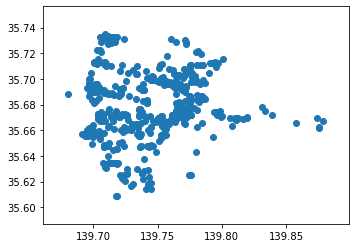

In [8]:
gdf.plot()

In [9]:
gdf.to_file("../data/store_all.geojson", driver='GeoJSON')

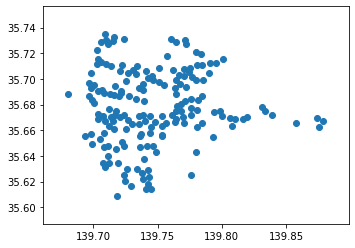

In [11]:
df2 = df[(df['area'] < 17) &
         (df['area'] != 15) &
         (df['area'] != 12) &
         (df['score'] != '-') &
         (df['delegate1'] == 1)]
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))
gdf.plot()

In [12]:
gdf.to_file("../data/store_delegate.geojson", driver='GeoJSON')

In [13]:
gdf.head().to_file("../data/store_delegate_head.geojson", driver='GeoJSON')